In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.graphics.mosaicplot import mosaic

%pylab inline
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号 '-' 显示为方块的问题

Populating the interactive namespace from numpy and matplotlib


# 载入和分析数据

In [4]:
def readData(path):
    """
    使用pandas读取数据
    """
    data = pd.read_csv(path)
    cols = ["age", "education_num", "capital_gain", "capital_loss", "hours_per_week", "label"]
    return data[cols]

data = readData('dataset/adult.data')

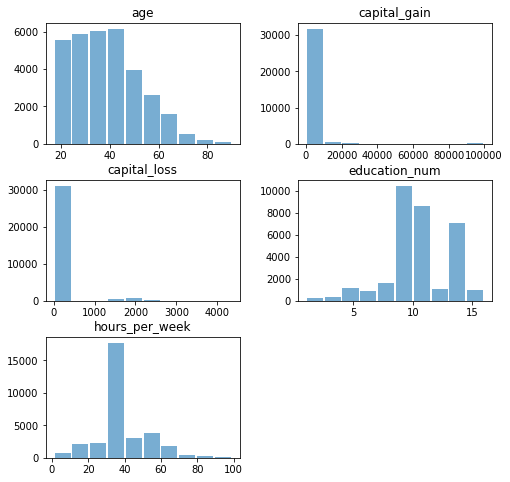

In [5]:
data.hist(rwidth=0.9, grid=False, figsize=(8, 8), alpha=0.6)   # 各个变量的直方图
plt.show()

In [6]:
data.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,label
0,39,13,2174,0,40,<=50K
1,50,13,0,0,13,<=50K
2,38,9,0,0,40,<=50K
3,53,7,0,0,40,<=50K
4,28,13,0,0,40,<=50K


In [8]:
data['label_code'] = pd.Categorical(data.label).codes   # 将文字变量转化为数字变量

In [10]:
data[['label', 'label_code']].head(8)

,label,label_code
0,<=50K,0
1,<=50K,0
2,<=50K,0
3,<=50K,0
4,<=50K,0
5,<=50K,0
6,<=50K,0
7,>50K,1


In [18]:
def visualData(df):
    """
    画直方图，直观了解数据
    """
    df.hist(
        rwidth=0.9, grid=False, figsize=(8, 8), alpha=0.6, color="grey")
    plt.show(block=False)

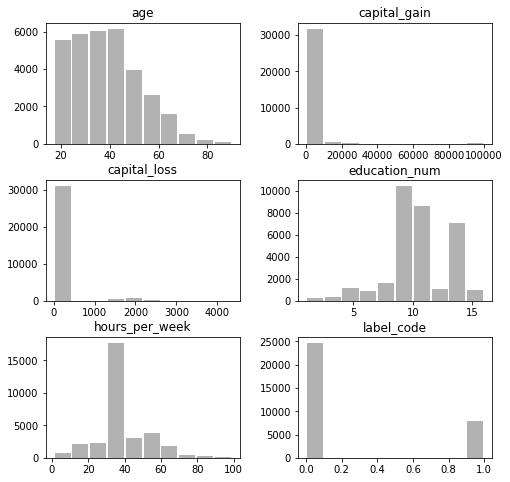

In [19]:
df = data[["age", "education_num", "capital_gain", "capital_loss", "hours_per_week", "label_code"]]
visualData(df)

In [20]:
data.describe()  # 仅仅显示数值型变量的基本统计信息，若要显示全部变量的统计信息只需传入参数 `include='all'`

,age,education_num,capital_gain,capital_loss,hours_per_week,label_code
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


## 交叉报表

**交叉报表**用来描述两个变量之间的关系。

- 按四分位数划分为 $4$ 个区间

In [23]:
qeducation_num = pd.qcut(data['education_num'], [.25, .5, .75, 1])  
qeducation_num

0         (12.0, 16.0]
1         (12.0, 16.0]
2        (8.999, 10.0]
3                  NaN
4         (12.0, 16.0]
5         (12.0, 16.0]
6                  NaN
7        (8.999, 10.0]
8         (12.0, 16.0]
9         (12.0, 16.0]
10       (8.999, 10.0]
11        (12.0, 16.0]
12        (12.0, 16.0]
13        (10.0, 12.0]
14        (10.0, 12.0]
15                 NaN
16       (8.999, 10.0]
17       (8.999, 10.0]
18                 NaN
19        (12.0, 16.0]
20        (12.0, 16.0]
21       (8.999, 10.0]
22                 NaN
23                 NaN
24       (8.999, 10.0]
25        (12.0, 16.0]
26       (8.999, 10.0]
27       (8.999, 10.0]
28       (8.999, 10.0]
29       (8.999, 10.0]
             ...      
32531     (12.0, 16.0]
32532     (12.0, 16.0]
32533     (12.0, 16.0]
32534    (8.999, 10.0]
32535              NaN
32536     (12.0, 16.0]
32537    (8.999, 10.0]
32538     (12.0, 16.0]
32539     (12.0, 16.0]
32540    (8.999, 10.0]
32541    (8.999, 10.0]
32542    (8.999, 10.0]
32543     (

- 计算 `education_num` 和 `label` 的交叉报表

In [48]:
cross1 = pd.crosstab(data['label'], qeducation_num)
cross1

education_num,"(8.999, 10.0]","(10.0, 12.0]","(12.0, 16.0]"
label,,,
<=50K,14730,1823,4158
>50K,3062,626,3909


将 `cross1` 图表化

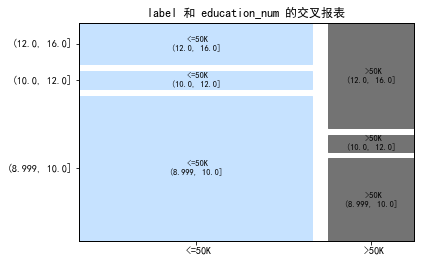

In [65]:
props = lambda key: {"color": "0.45"} if ' >50K' in key else {"color": "#C6E2FF"}
mosaic(cross1.stack(), gap=0.05,properties=props, title='label 和 education_num 的交叉报表')
plt.show()

# 搭建模型，并训练模型

`statsmodels` 建模时可以使用类似文字的表达式:

`formula` 定义了模型的形式, `~` 相当于等号.

In [67]:
def trainModel(data):
    """
    搭建逻辑回归模型，并训练模型
    """
    formula = "label_code ~ age + education_num + capital_gain + capital_loss + hours_per_week"
    model = sm.Logit.from_formula(formula, data=data)
    re = model.fit()
    return re

In [70]:
def modelSummary(re):
    """
    分析逻辑回归模型的统计性质
    """
    # 整体统计分析结果
    print(re.summary())
    # 用f test检验education_num的系数是否显著
    print("检验假设education_num的系数等于0：")
    print(re.f_test("education_num=0"))
    # 用f test检验两个假设是否同时成立
    print("检验假设education_num的系数等于0.32和hours_per_week的系数等于0.04同时成立：")
    print(re.f_test("education_num=0.32, hours_per_week=0.04"))

def interpretModel(re):
    """
    理解模型结果

    参数
    ----
    re ：BinaryResults，训练好的逻辑回归模型
    """
    conf = re.conf_int()
    conf['OR'] = re.params
    # 计算各个变量对事件发生比的影响
    # conf里面的三列，分别对应着估计值的下界、上界和估计值本身
    conf.columns = ['2.5%', '97.5%', 'OR']
    print("各个变量对事件发生比的影响：")
    print(np.exp(conf))
    # 计算各个变量的边际效应
    print("各个变量的边际效应：")
    print(re.get_margeff(at="overall").summary())


def makePrediction(re, testSet, alpha=0.5):
    """
    使用训练好的模型对测试数据做预测
    """
    # 关闭pandas有关chain_assignment的警告
    pd.options.mode.chained_assignment = None
    # 计算事件发生的概率
    testSet["prob"] = re.predict(testSet)
    print("事件发生概率（预测概率）大于0.6的数据个数：")
    print(testSet[testSet["prob"] > 0.6].shape[0])  # 输出值为576
    print("事件发生概率（预测概率）大于0.5的数据个数：")
    print(testSet[testSet["prob"] > 0.5].shape[0])  # 输出值为834
    # 根据预测的概率，得出最终的预测
    testSet["pred"] = testSet.apply(lambda x: 1 if x["prob"] > alpha else 0, axis=1)
    return testSet


def evaluation(re):
    """
    计算预测结果的查准查全率以及f1

    参数
    ----
    re ：DataFrame，预测结果，里面包含两列：真实值‘lable_code’、预测值‘pred’
    """
    bins = np.array([0, 0.5, 1])
    label = re["label_code"]
    pred = re["pred"]
    tp, fp, fn, tn = np.histogram2d(label, pred, bins=bins)[0].flatten()
    precision = tp / (tp + fp)  # 0.951
    recall = tp / (tp + fn)  # 0.826
    f1 = 2 * precision * recall / (precision + recall)  # 0.884
    print("查准率: %.3f, 查全率: %.3f, f1: %.3f" % (precision, recall, f1))


In [72]:
# 将数据分为训练集和测试集
trainSet, testSet = train_test_split(data, test_size=0.2, random_state=2310)

# 训练模型并分析模型效果
re = trainModel(trainSet)
modelSummary(re)
interpretModel(re)

Optimization terminated successfully.
         Current function value: 0.406094
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             label_code   No. Observations:                26048
Model:                          Logit   Df Residuals:                    26042
Method:                           MLE   Df Model:                            5
Date:                Wed, 22 Aug 2018   Pseudo R-squ.:                  0.2639
Time:                        19:29:31   Log-Likelihood:                -10578.
converged:                       True   LL-Null:                       -14370.
                                        LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -8.2970      0.128    -64.623      0.000      -8.549      -8.045
age              

In [73]:
re = makePrediction(re, testSet)
evaluation(re)

事件发生概率（预测概率）大于0.6的数据个数：
576
事件发生概率（预测概率）大于0.5的数据个数：
834
查准率: 0.951, 查全率: 0.826, f1: 0.884
